In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Experimento1

In [2]:
df_exp1 = pd.read_csv("resultados/exp-1.csv");

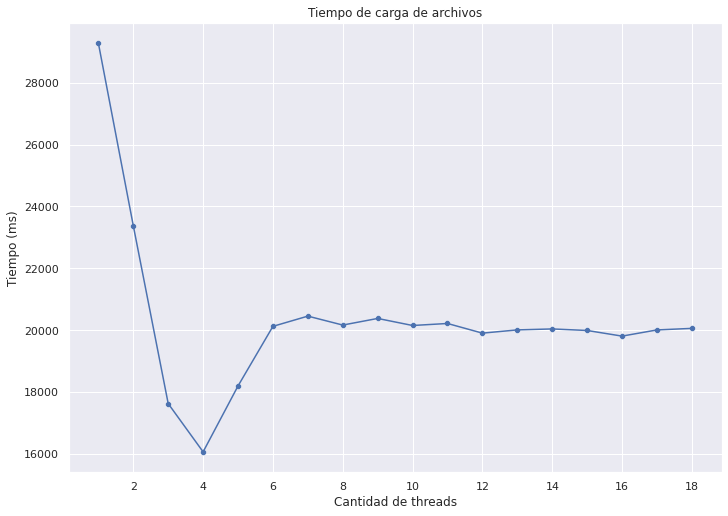

In [3]:
fig = sns.scatterplot(data=df_exp1, x="cant_threads", y="tiempo_carga")
fig = sns.lineplot(data=df_exp1, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos")
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-carga.svg");

In [71]:
mayor_dif = (df_exp1["tiempo_carga"].max() / df_exp1["tiempo_carga"].min()) - 1
print(f"Con multithreading alcanzamos una ejecución {mayor_dif}% más rápida")
df_calc_aux = df_exp1[df_exp1["cant_threads"] > 5]
dif_estancado = (df_calc_aux["tiempo_carga"].mean() / df_exp1["tiempo_carga"].min()) - 1
print(f"La cantidad de threads óptima fue {dif_estancado}% más rápida que con cantidades mayores de threads")

Con multithreading alcanzamos una ejecución 0.8240492769148364% más rápida
La cantidad de threads óptima fue 0.2516406315125814% más rápida que con cantidades mayores de threads


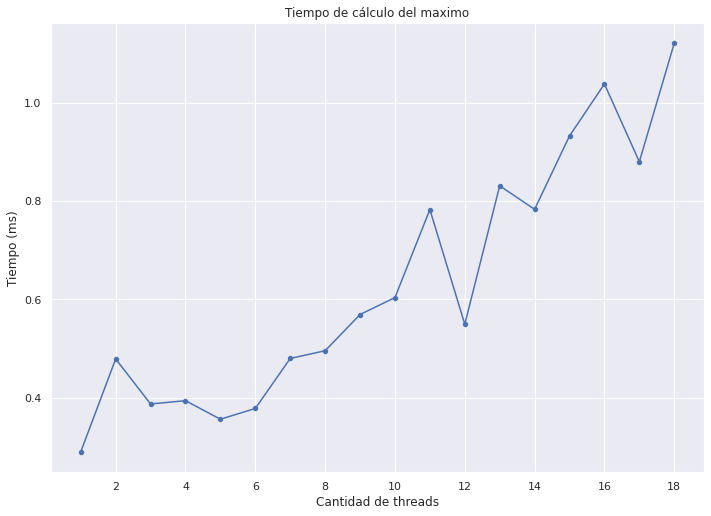

In [4]:
fig = sns.scatterplot(data=df_exp1, x="cant_threads", y="tiempo_max")
fig = sns.lineplot(data=df_exp1, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de cálculo del maximo")
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-max.svg");

## Experimento 2

In [80]:
df_exp2 = pd.read_csv("resultados/experimento_separados.csv")

In [81]:
cant_archivos = []
for i in range(1, 11):
    n = 2**i
    for j in range(19):
        cant_archivos.append(n)
df_exp2["cant_archivos"] = cant_archivos

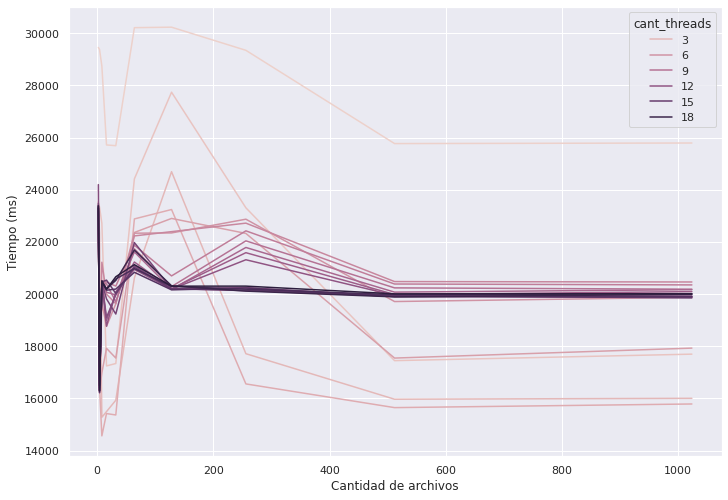

In [82]:
fig = sns.lineplot(data=df_exp2, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2.svg");

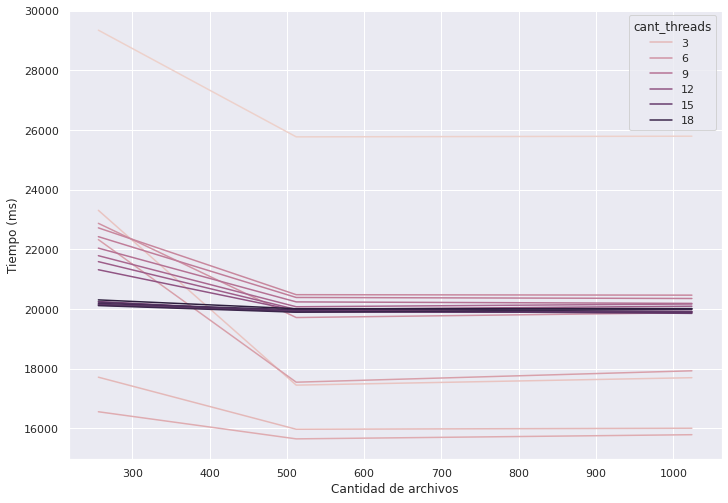

In [83]:
df_exp2_aux = df_exp2[df_exp2["cant_archivos"] > 150]
fig = sns.lineplot(data=df_exp2_aux, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2-alta.svg");

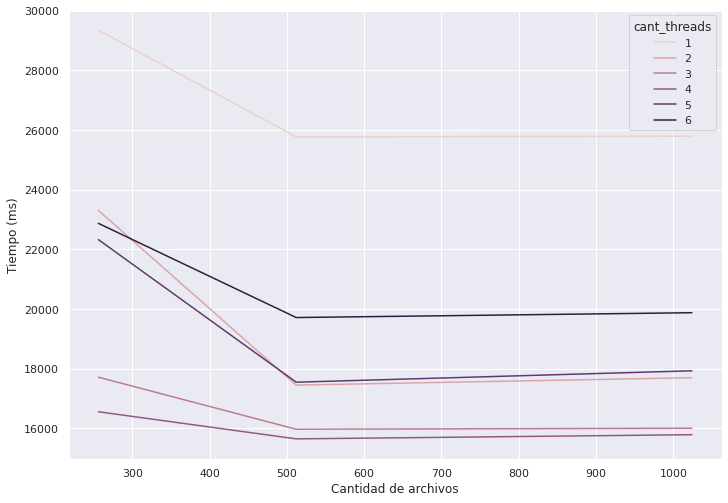

In [84]:
df_exp2_aux2 = df_exp2[(df_exp2["cant_archivos"] > 150) & (df_exp2["cant_threads"] < 7)]
fig = sns.lineplot(data=df_exp2_aux2, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2-alta2.svg");

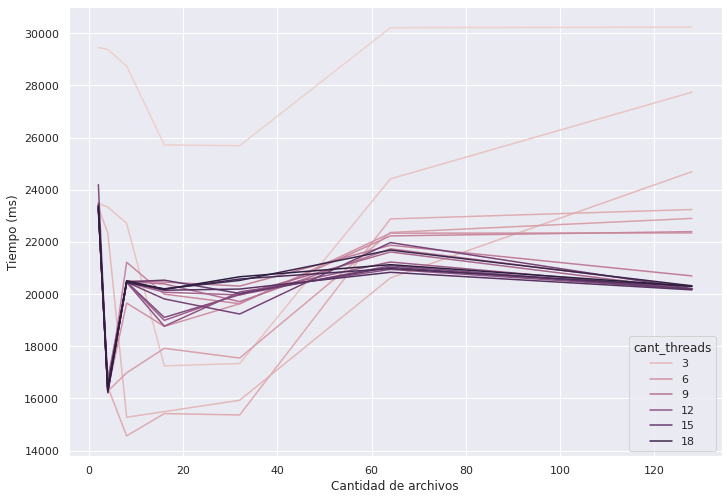

In [85]:
df_exp2_aux1 = df_exp2[df_exp2["cant_archivos"] < 150]
fig = sns.lineplot(data=df_exp2_aux1, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2-baja.svg");

# Experimento 3

## Experimento 3.1

In [11]:
df_exp31 = pd.read_csv("resultados/exp-31.csv");
mean_carga = df_exp31["tiempo_carga"]
sd_carga = np.sqrt(df_exp31["varianza_carga"])
mean_maximo = df_exp31["tiempo_max"]
sd_max = np.sqrt(df_exp31["varianza_max"])

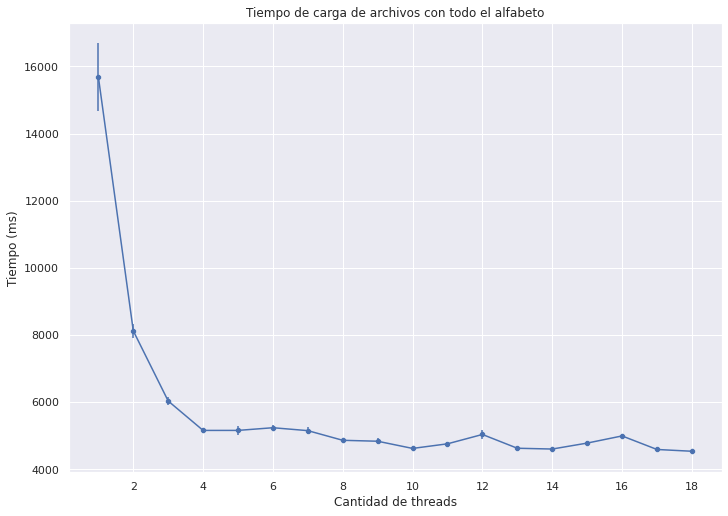

In [12]:
fig = sns.scatterplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos con todo el alfabeto")
fig.errorbar(df_exp31["cant_threads"],mean_carga,yerr=sd_carga)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-carga-alf1.svg");

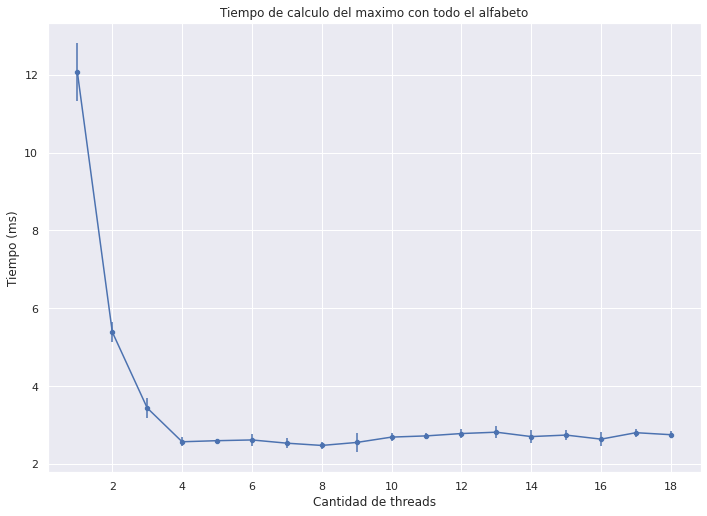

In [13]:
fig = sns.scatterplot(data=df_exp31, x="cant_threads", y="tiempo_max")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de calculo del maximo con todo el alfabeto")
fig.errorbar(df_exp31["cant_threads"],mean_maximo,yerr=sd_max)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-max-alf1.svg");

## Experimento 3.2

In [26]:
df_exp32 = pd.read_csv("resultados/exp-32.csv");
mean_carga = df_exp32["tiempo_carga"]
sd_carga = np.sqrt(df_exp32["varianza_carga"])
mean_maximo = df_exp32["tiempo_max"]
sd_max = np.sqrt(df_exp32["varianza_max"])

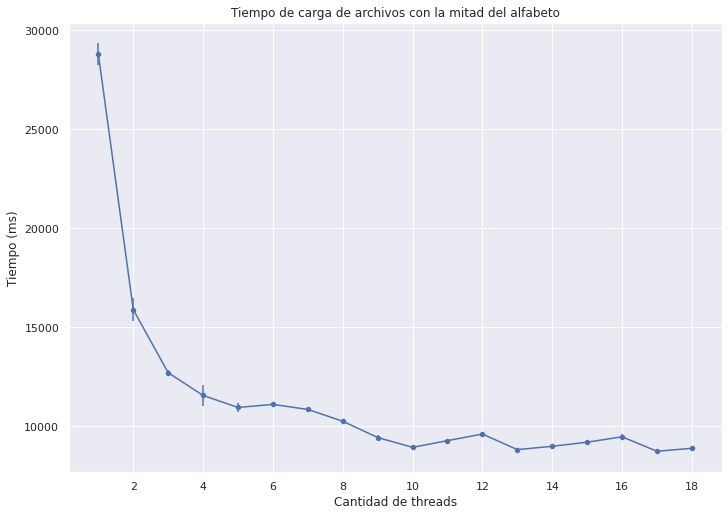

In [27]:
fig = sns.scatterplot(data=df_exp32, x="cant_threads", y="tiempo_carga")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos con la mitad del alfabeto")
fig.errorbar(df_exp32["cant_threads"],mean_carga,yerr=sd_carga)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-carga-alf2.svg");

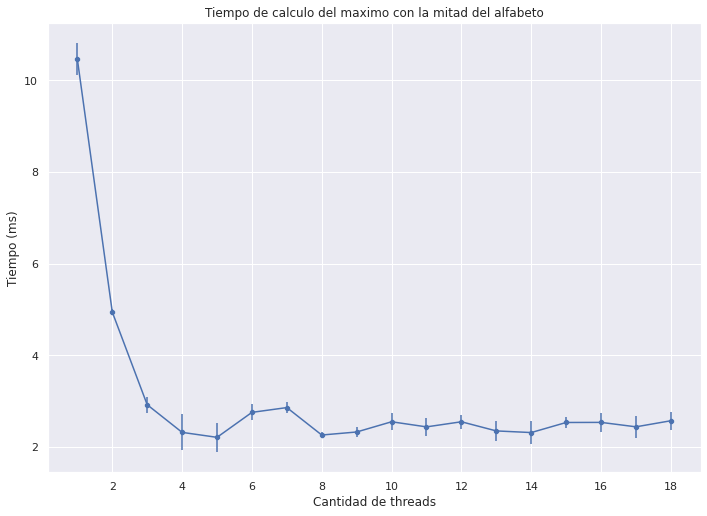

In [28]:
fig = sns.scatterplot(data=df_exp32, x="cant_threads", y="tiempo_max")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de calculo del maximo con la mitad del alfabeto")
fig.errorbar(df_exp32["cant_threads"],mean_maximo,yerr=sd_max)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-max-alf2.svg");

## Experimento 3.3

In [29]:
df_exp33 = pd.read_csv("resultados/exp-33.csv");
mean_carga = df_exp33["tiempo_carga"]
sd_carga = np.sqrt(df_exp33["varianza_carga"])
mean_maximo = df_exp33["tiempo_max"]
sd_max = np.sqrt(df_exp33["varianza_max"])

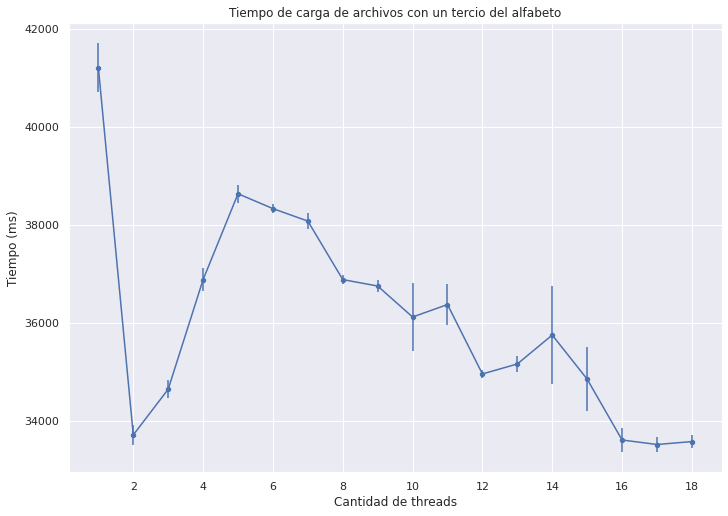

In [30]:
fig = sns.scatterplot(data=df_exp33, x="cant_threads", y="tiempo_carga")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos con un tercio del alfabeto")
fig.errorbar(df_exp33["cant_threads"],mean_carga,yerr=sd_carga)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-carga-alf3.svg");

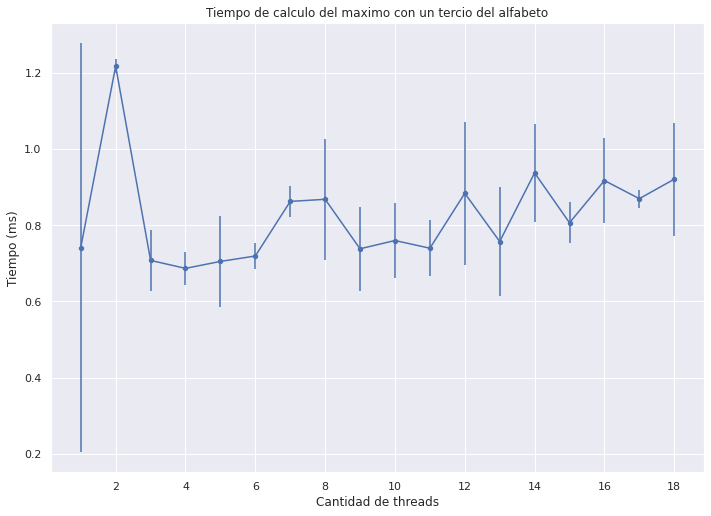

In [32]:
fig = sns.scatterplot(data=df_exp33, x="cant_threads", y="tiempo_max")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de calculo del maximo con un tercio del alfabeto")
fig.errorbar(df_exp33["cant_threads"],mean_maximo,yerr=sd_max)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-max-alf3.svg");

## los 3 juntos

In [33]:
mean_carga1 = df_exp31["tiempo_carga"]
sd_carga1 = np.sqrt(df_exp31["varianza_carga"])
mean_maximo1 = df_exp31["tiempo_max"]
sd_max1 = np.sqrt(df_exp31["varianza_max"])

In [34]:
mean_carga2 = df_exp32["tiempo_carga"]
sd_carga2 = np.sqrt(df_exp32["varianza_carga"])
mean_maximo2 = df_exp32["tiempo_max"]
sd_max2 = np.sqrt(df_exp32["varianza_max"])

In [35]:
mean_carga3 = df_exp33["tiempo_carga"]
sd_carga3 = np.sqrt(df_exp33["varianza_carga"])
mean_maximo3 = df_exp33["tiempo_max"]
sd_max3 = np.sqrt(df_exp33["varianza_max"])

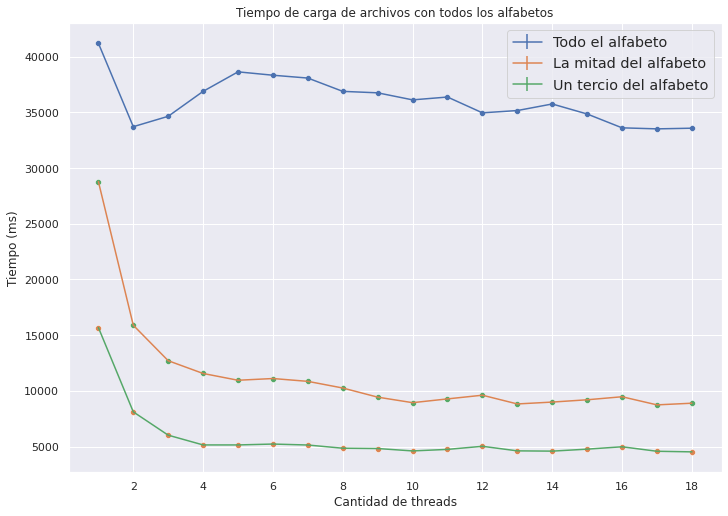

In [36]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_exp33, x="cant_threads", y="tiempo_carga", ax=ax)
sns.scatterplot(data=df_exp31, x="cant_threads", y="tiempo_carga", ax=ax)
sns.scatterplot(data=df_exp32, x="cant_threads", y="tiempo_carga", ax=ax)

ax.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
ax.set_title("Tiempo de carga de archivos con todos los alfabetos")
ax.errorbar(df_exp33["cant_threads"],mean_carga3,yerr=sd_max3, label="Todo el alfabeto")
ax.errorbar(df_exp32["cant_threads"],mean_carga2,yerr=sd_max2, label="La mitad del alfabeto")
ax.errorbar(df_exp31["cant_threads"],mean_carga1,yerr=sd_max1, label="Un tercio del alfabeto")
ax.legend(fontsize='14.4')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-carga-todos.svg");

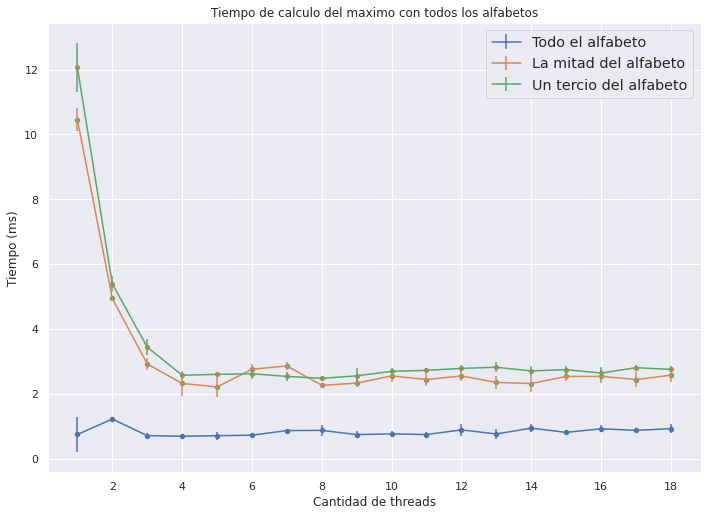

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_exp33, x="cant_threads", y="tiempo_max", ax=ax)
sns.scatterplot(data=df_exp31, x="cant_threads", y="tiempo_max", ax=ax)
sns.scatterplot(data=df_exp32, x="cant_threads", y="tiempo_max", ax=ax)

ax.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
ax.set_title("Tiempo de calculo del maximo con todos los alfabetos")
ax.errorbar(df_exp33["cant_threads"],mean_maximo3,yerr=sd_max3, label="Todo el alfabeto")
ax.errorbar(df_exp32["cant_threads"],mean_maximo2,yerr=sd_max2, label="La mitad del alfabeto")
ax.errorbar(df_exp31["cant_threads"],mean_maximo1,yerr=sd_max1, label="Un tercio del alfabeto")
ax.legend(fontsize='14.4')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("graficos/cant-threads-vs-tiempo-maximo-todos.svg");